In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy
import PIL
import requests
import plotly as ply


In [134]:
# the relative path of the stroke_positive csv dataset is saved into the variable data for ease of use
data = './data/patients_with_stroke.csv'

# The data is read and saved in a variable (stroke_positive)
stroke_positive = pd.read_csv(data)

stroke_positive = pd.DataFrame(stroke_positive)


stroke_positive

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
244,Male,57.0,0,0,Yes,Private,Rural,84.96,36.7,Unknown,1
245,Female,14.0,0,0,No,children,Rural,57.93,30.9,Unknown,1
246,Female,75.0,0,0,Yes,Self-employed,Rural,78.80,29.3,formerly smoked,1
247,Male,71.0,1,0,Yes,Self-employed,Rural,87.80,NaN,Unknown,1


In [135]:
column_names = stroke_positive.columns

print(column_names)

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


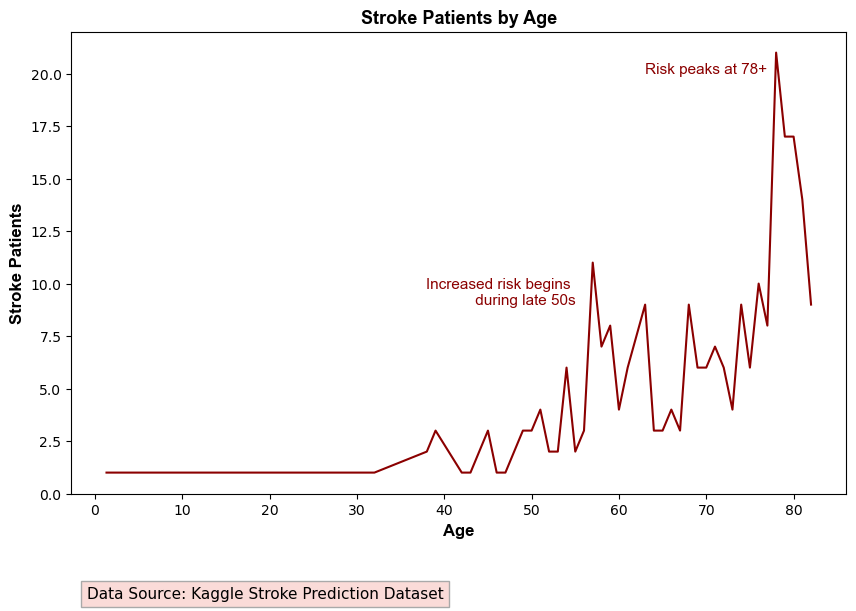

In [136]:
# Count patients by age
age_counts = stroke_positive['age'].value_counts().sort_index()

# Bar Plot for Count of patients by age
ax= age_counts.plot(kind='line', color='darkred', figsize=(10,6))
plt.title('Stroke Patients by Age', 
          fontweight='bold', 
          fontsize='13', 
          fontfamily='arial')
plt.xlabel('Age', 
           fontweight='bold', 
           fontsize='12', 
           fontfamily='arial')
plt.ylabel('Stroke Patients',
           fontweight='bold', 
           fontsize='12',
           fontfamily='arial')

max_age = age_counts.idxmax()
max_count = age_counts.max()

# Annotate the maximum point
ax.annotate(
    'Risk peaks at 78+',
    xy=(max_age, max_count),           # point to highlight
    xytext=(max_age-15, max_count-1),   # text position offset
    #arrowprops=dict(facecolor='hotpink', arrowstyle='->'),
    fontsize=11,
    color='darkred',
    fontfamily='arial',
)

ax.annotate(
    'Increased risk begins \n during late 50s',
    xy=(55, 11),           # point to highlight
    xytext=(max_age-23, max_count-12),   # text position offset
    #arrowprops=dict(facecolor='hotpink', arrowstyle='->'),
    fontsize=11,
    color='darkred',#'#36454F',
    ha='right',
    fontfamily='arial',
    
)

plt.text(
    0.02, -0.2,  # position (relative to axes)
    'Data Source: Kaggle Stroke Prediction Dataset',
    transform=plt.gca().transAxes,  # place relative to entire figure
    fontsize=11,
    color='black',
    ha='left',  # align text horizontally inside box
    va='top',     # align text vertically inside box
    bbox=dict(
        #boxstyle='round,pad=0.6',  # shape and padding
        facecolor='#FADBD8',       # light red background
        edgecolor='darkgrey',       # border color
       # linewidth=1.5
    )
)

plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_34132\1888710739.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels1, fontsize=11, fontfamily='arial', fontweight='bold')


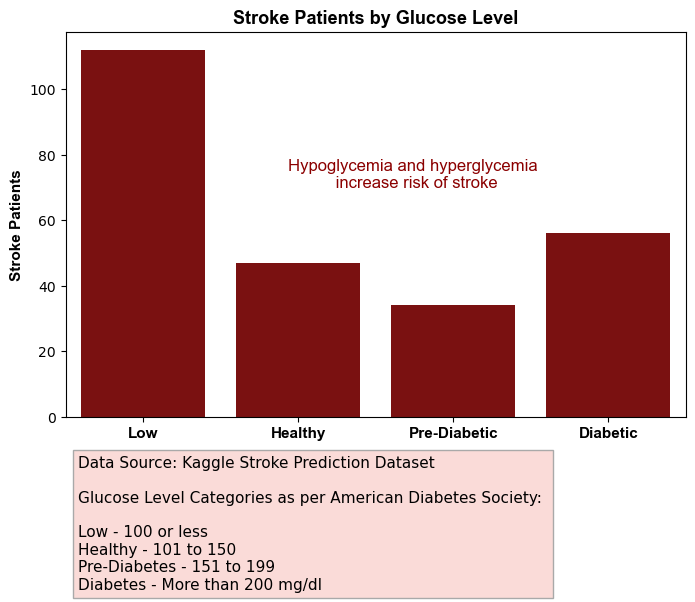

In [137]:
# Define the bins (boundaries) of x-axis categories
bins = [0, 100, 150, 200, float('inf')]

# Define the labels for each bin
labels1 = ['Low', 'Healthy', 'Pre-Diabetic', 'Diabetic']

# Create the glucose_category column
stroke_positive['glucose_category'] = pd.cut(
    stroke_positive['avg_glucose_level'],  
    bins=bins,
    labels=labels1,
    right=False
)
# Create Seaborn countplot with specific colors
fig, ax1 = plt.subplots(figsize=(8,5))
sns.countplot(
    data=stroke_positive,
    x='glucose_category',
    order=labels1,
    color='darkred',
    ax=ax1
)

# Titles and labels
ax1.set_title('Stroke Patients by Glucose Level', fontsize=13, fontfamily='arial', fontweight='bold')
ax1.set_xlabel('')
ax1.set_ylabel('Stroke Patients', fontsize=11, fontfamily='arial', fontweight='bold')

# Bold x-axis labels
ax1.set_xticklabels(labels1, fontsize=11, fontfamily='arial', fontweight='bold')

# Annotate maximum bar (example for 'Low' category)
ax1.annotate(
    'Hypoglycemia and hyperglycemia \n increase risk of stroke',
    xy=('Low', 80),           # bar to highlight
    xytext=(1.75, 70),        # position for text
    fontsize=12,
    color='darkred',
    fontfamily='arial',
    ha='center',
)

plt.text(
    0.02, -0.1,  # position (relative to axes)
    'Data Source: Kaggle Stroke Prediction Dataset \n'
    '\n'
    'Glucose Level Categories as per American Diabetes Society: \n'
    '\n'
    'Low - 100 or less \n'
    'Healthy - 101 to 150 \n'
    'Pre-Diabetes - 151 to 199 \n'
    'Diabetes - More than 200 mg/dl' ,
    transform=plt.gca().transAxes,  # place relative to entire figure
    fontsize=11,
    color='black',
    ha='left',  # align text horizontally inside box
    va='top',     # align text vertically inside box
    bbox=dict(
        #boxstyle='round,pad=0.6',  # shape and padding
        facecolor='#FADBD8',       # light red background
        edgecolor='darkgrey',       # border color
       # linewidth=1.5
    )
)

plt.show()


C:\Users\User\AppData\Local\Temp\ipykernel_34132\552879556.py:30: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(labels2, fontsize=11, fontfamily='arial', fontweight='bold')


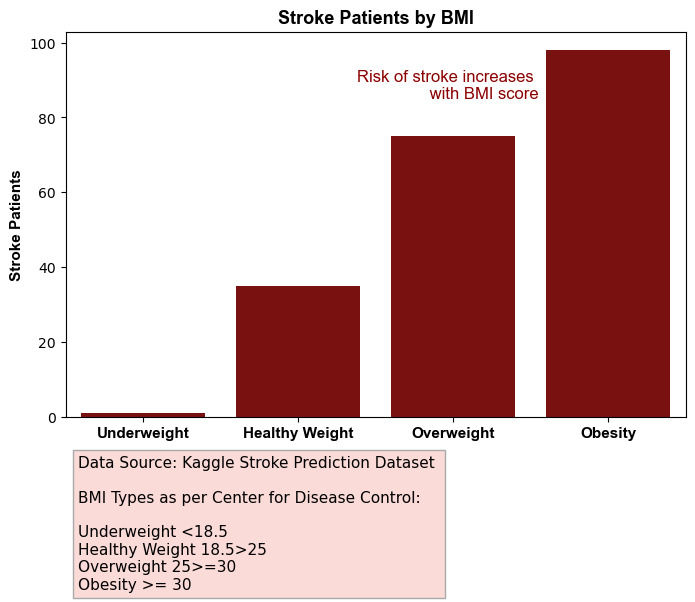

In [138]:
# Define the bins (boundaries) of x-axis categories
bins = [0, 18.5, 25, 30, float('inf')]

# Define the labels for each bin
labels2 = ['Underweight', 'Healthy Weight', 'Overweight', 'Obesity']

# Create the glucose_category column
stroke_positive['bmi_category'] = pd.cut(
    stroke_positive['bmi'],
    bins=bins,
    labels=labels2,
    right=False
)
# Create Seaborn countplot with specific colors
fig, ax2 = plt.subplots(figsize=(8,5))
sns.countplot(
    data=stroke_positive,
    x='bmi_category',
    order=labels2,
    color='darkred',
    ax=ax2
)

# Titles and labels
ax2.set_title('Stroke Patients by BMI', fontsize=13, fontfamily='arial', fontweight='bold')
ax2.set_xlabel('')
ax2.set_ylabel('Stroke Patients', fontsize=11, fontfamily='arial', fontweight='bold')

# Bold x-axis labels
ax2.set_xticklabels(labels2, fontsize=11, fontfamily='arial', fontweight='bold')

# Annotate maximum bar (example for 'Low' category)
ax2.annotate(
    'Risk of stroke increases \n with BMI score',
    xy=('Underweight', 85),           # bar to highlight
    xytext=(2.55, 85),        # position for text
    fontsize=12,
    color='darkred',
    fontfamily='arial',
    ha='right',
)

plt.text(
    0.02, -0.1,  # position (relative to axes)
    'Data Source: Kaggle Stroke Prediction Dataset \n'
    '\n'
    'BMI Types as per Center for Disease Control: \n'
    '\n'
    'Underweight <18.5  \n'
    'Healthy Weight 18.5>25 \n'
    'Overweight 25>=30 \n'
    'Obesity >= 30',
    transform=plt.gca().transAxes,  # place relative to entire figure
    fontsize=11,
    color='black',
    ha='left',  # align text horizontally inside box
    va='top',     # align text vertically inside box
    bbox=dict(
        #boxstyle='round,pad=0.6',  # shape and padding
        facecolor='#FADBD8',       # light red background
        edgecolor='darkgrey',       # border color
       # linewidth=1.5
    )
)

plt.show()

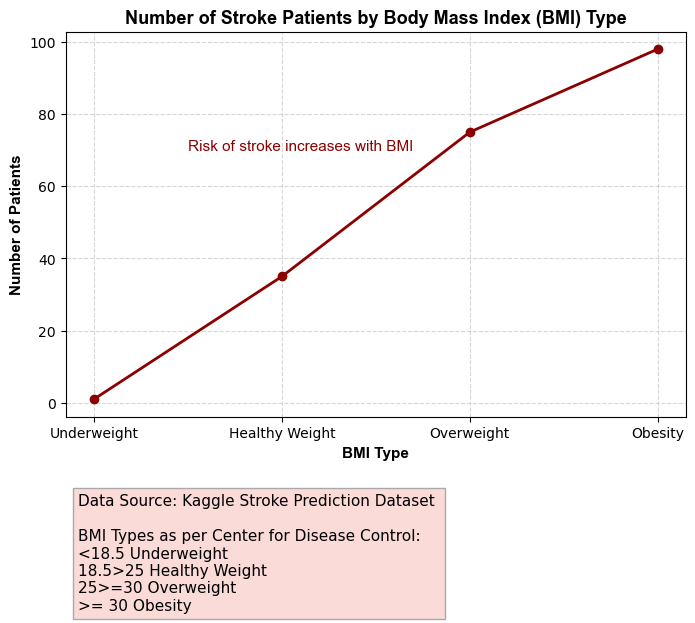

In [139]:
# Count patients per BMI category
bmi_counts = stroke_positive['bmi_category'].value_counts().reindex(labels2)

# Create line plot
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(bmi_counts.index, bmi_counts.values, marker='o', color='darkred', linewidth=2)

# Titles and labels
ax.set_title('Number of Stroke Patients by Body Mass Index (BMI) Type', fontsize=13, fontfamily='arial', fontweight='bold')
ax.set_xlabel('BMI Type', fontsize=11, fontfamily='arial', fontweight='bold')
ax.set_ylabel('Number of Patients', fontsize=11, fontfamily='arial', fontweight='bold')

# Optional: annotate max point
max_bmi = bmi_counts.idxmax()
max_count = bmi_counts.max()
ax.annotate(
    'Risk of stroke increases with BMI',
    xy=('Underweight', 85),
    xytext=(1.1, 70),
    fontsize=11,
    color='darkred',
    fontfamily='arial',
    ha='center'
)

plt.grid(True, linestyle='--', alpha=0.5)

plt.text(
    0.02, -0.2,  # position (relative to axes)
    'Data Source: Kaggle Stroke Prediction Dataset \n'
    '\n'
    'BMI Types as per Center for Disease Control: \n'
    '<18.5 Underweight \n'
    '18.5>25 Healthy Weight \n'
    '25>=30 Overweight \n'
    '>= 30 Obesity',
    transform=plt.gca().transAxes,  # place relative to entire figure
    fontsize=11,
    color='black',
    ha='left',  # align text horizontally inside box
    va='top',     # align text vertically inside box
    bbox=dict(
        #boxstyle='round,pad=0.6',  # shape and padding
        facecolor='#FADBD8',       # light red background
        edgecolor='darkgrey',       # border color
       # linewidth=1.5
    )
)

plt.show()

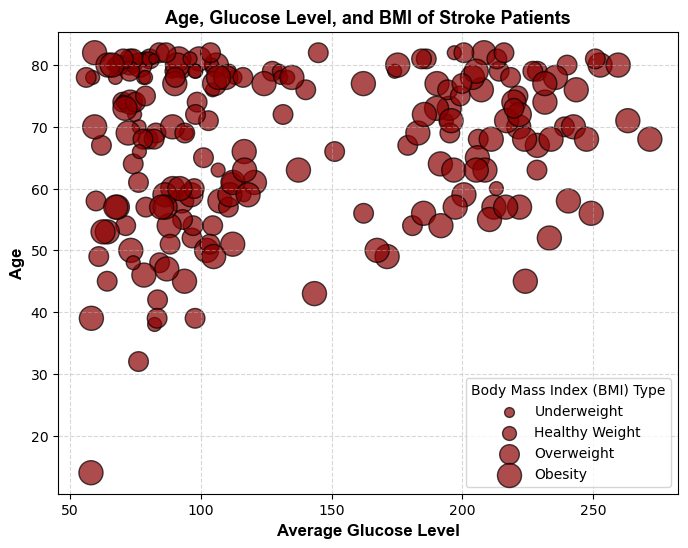

In [140]:
# Define BMI bins and labels
bmi_bins = [0, 18.5, 25, 30, float('inf')]
bmi_labels = ['Underweight', 'Healthy Weight', 'Overweight', 'Obesity']

# Create a BMI category column
stroke_positive['bmi_category'] = pd.cut(stroke_positive['bmi'], bins=bmi_bins, labels=bmi_labels, right=False)

# Map BMI categories to bubble sizes
size_map = {
    'Underweight': 50,
    'Healthy Weight': 100,
    'Overweight': 200,
    'Obesity': 300
}
sizes = stroke_positive['bmi_category'].map(size_map)

# X-axis: Glucose, Y-axis: Age
x = stroke_positive['avg_glucose_level']
y = stroke_positive['age']

plt.figure(figsize=(8,6))
scatter = plt.scatter(x, y, s=sizes, alpha=0.7, color='darkred', edgecolors='black')

# Labels and title
plt.xlabel('Average Glucose Level', fontsize=12, fontweight='bold', fontfamily='arial')
plt.ylabel('Age', fontsize=12, fontweight='bold', fontfamily='arial')
plt.title('Age, Glucose Level, and BMI of Stroke Patients', 
          fontsize=13, fontweight='bold', fontfamily='arial')

# Optional: grid
plt.grid(True, linestyle='--', alpha=0.5)

# Add a legend for bubble sizes
for category, size in size_map.items():
    plt.scatter([], [], s=size, label=category, color='darkred', alpha=0.7, edgecolors='black')
plt.legend(title='Body Mass Index (BMI) Type', fontsize=10)

plt.show()
